## Read the CSV 

In [ ]:
#imports the pandas library
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt #(*bonus* for plotting a barchart for temporary visual representation )

df= pd.read_csv('data/product.csv', sep=";") #using pandas to read in and open the csv file, semicolon sperated
print(df)

          id             name          price currency  created_at
0   SKU-1001           shoes             799      SEK  2024-01-10
1   SKU-1002            pants            520      SEK  2024/02/15
2   SKU-1003           shirts            450      SEK         NaN
3        NaN           jacket           -200     SEK   2024-13-01
4   SKU-1005              NaN            NaN      NaN            
5   SKU-1006    designer coat            NaN      SEK  2024-05-01
6        NaN              hat           free      SEK         NaN
7   SKU-1008          gloves             120      NaN  2024-06-20
8   SKU-1009            socks             99      SEK  2024-02-01
9   SKU-1010            boots           1500      SEK  2024-02-15
10  SKU-1011            scarf            200      SEK  2024-03-01
11  SKU-1012             belt            300      SEK  2024/03/10
12  SKU-1013              cap             75      SEK  2024-04-01
13  SKU-1014          t-shirt              0      SEK  2024-04-10
14  SKU-10

## Clean basic formatting

In [2]:
#cleans by astype for type conversion and strip method(removes extra spaces, new line syntax, symbols and so on)

df["id"]= df["id"].str.strip() 
df["name"] = df["name"].str.strip()
df["currency"] = df["currency"].str.strip()
df["created_at"] = df["created_at"].str.strip()

print(df)


          id           name          price currency  created_at
0   SKU-1001          shoes            799      SEK  2024-01-10
1   SKU-1002          pants            520      SEK  2024/02/15
2   SKU-1003         shirts            450      SEK         NaN
3        NaN         jacket           -200      SEK  2024-13-01
4   SKU-1005            NaN            NaN      NaN            
5   SKU-1006  designer coat            NaN      SEK  2024-05-01
6        NaN            hat           free      SEK         NaN
7   SKU-1008         gloves            120      NaN  2024-06-20
8   SKU-1009          socks             99      SEK  2024-02-01
9   SKU-1010          boots           1500      SEK  2024-02-15
10  SKU-1011          scarf            200      SEK  2024-03-01
11  SKU-1012           belt            300      SEK  2024/03/10
12  SKU-1013            cap             75      SEK  2024-04-01
13  SKU-1014        t-shirt              0      SEK  2024-04-10
14  SKU-1015         hoodie            -

## Converts price to numeric and dates properly

In [3]:
#Converts price to numeric(e.g, "free", "not available", "empty" to NaN)
df["price"]= pd.to_numeric(df["price"], errors="coerce")

#Converts dates properly

df["created_at"] = df["created_at"].astype(str).str.replace("/", "-")
df["created_at"]=pd.to_datetime(
    df["created_at"], 
    errors= "coerce",
    yearfirst= True
)

print(df)
 

          id           name     price currency created_at
0   SKU-1001          shoes     799.0      SEK 2024-01-10
1   SKU-1002          pants     520.0      SEK 2024-02-15
2   SKU-1003         shirts     450.0      SEK        NaT
3        NaN         jacket    -200.0      SEK        NaT
4   SKU-1005            NaN       NaN      NaN        NaT
5   SKU-1006  designer coat       NaN      SEK 2024-05-01
6        NaN            hat       NaN      SEK        NaT
7   SKU-1008         gloves     120.0      NaN 2024-06-20
8   SKU-1009          socks      99.0      SEK 2024-02-01
9   SKU-1010          boots    1500.0      SEK 2024-02-15
10  SKU-1011          scarf     200.0      SEK 2024-03-01
11  SKU-1012           belt     300.0      SEK 2024-03-10
12  SKU-1013            cap      75.0      SEK 2024-04-01
13  SKU-1014        t-shirt       0.0      SEK 2024-04-10
14  SKU-1015         hoodie     -50.0      SEK 2024-04-15
15  SKU-1016           coat    2500.0      SEK 2024-05-01
16  SKU-1017  

## Rejects Impossible Values.

In [4]:
#each part returns a boolean series and | means OR which combines multiple boolean series row-by-row(checks the three for each of the rows)
reject_condition = (
    (df["id"].isna()) |    #invalid id
    (df["id"] == "") |       # missing ID
    (df["price"] < 0) |      # negative price
    (df["created_at"].isna())   # invalid or missing date
)

df_rejected = df[reject_condition].copy()
df_valid = df[~reject_condition].copy()

#print(df_rejected)


print(df_valid)

          id           name     price currency created_at
0   SKU-1001          shoes     799.0      SEK 2024-01-10
1   SKU-1002          pants     520.0      SEK 2024-02-15
5   SKU-1006  designer coat       NaN      SEK 2024-05-01
7   SKU-1008         gloves     120.0      NaN 2024-06-20
8   SKU-1009          socks      99.0      SEK 2024-02-01
9   SKU-1010          boots    1500.0      SEK 2024-02-15
10  SKU-1011          scarf     200.0      SEK 2024-03-01
11  SKU-1012           belt     300.0      SEK 2024-03-10
12  SKU-1013            cap      75.0      SEK 2024-04-01
13  SKU-1014        t-shirt       0.0      SEK 2024-04-10
15  SKU-1016           coat    2500.0      SEK 2024-05-01
16  SKU-1017          jeans     800.0      SEK 2024-05-05
17  SKU-1018       sneakers    1200.0      SEK 2024-05-10
18  SKU-1019        sandals     400.0      SEK 2024-05-15
19  SKU-1020          watch   15000.0      SEK 2024-06-01
20  SKU-1021           ring   25000.0      SEK 2024-06-05
21  SKU-1022  

## Flag Suspicious(but not reject): Now on df_valid(trusted dataset)

In [5]:
#Flag Missing currency
df_valid["flag_missing_currency"]= df_valid["currency"].isna() | (df_valid["currency"]=="") #flags missing currency or empty string value or space not stripped


#Flag Price equals 0
df_valid["flag_zero_price"]=df_valid["price"]==0

#Extreme high prices(luxury/suspicious): >10000

df_valid["flag_extreme_price"] = df_valid["price"] > 10000

print(df_valid)



          id           name     price currency created_at  \
0   SKU-1001          shoes     799.0      SEK 2024-01-10   
1   SKU-1002          pants     520.0      SEK 2024-02-15   
5   SKU-1006  designer coat       NaN      SEK 2024-05-01   
7   SKU-1008         gloves     120.0      NaN 2024-06-20   
8   SKU-1009          socks      99.0      SEK 2024-02-01   
9   SKU-1010          boots    1500.0      SEK 2024-02-15   
10  SKU-1011          scarf     200.0      SEK 2024-03-01   
11  SKU-1012           belt     300.0      SEK 2024-03-10   
12  SKU-1013            cap      75.0      SEK 2024-04-01   
13  SKU-1014        t-shirt       0.0      SEK 2024-04-10   
15  SKU-1016           coat    2500.0      SEK 2024-05-01   
16  SKU-1017          jeans     800.0      SEK 2024-05-05   
17  SKU-1018       sneakers    1200.0      SEK 2024-05-10   
18  SKU-1019        sandals     400.0      SEK 2024-05-15   
19  SKU-1020          watch   15000.0      SEK 2024-06-01   
20  SKU-1021           r

## Generate analytics_summary.csv

In [ ]:
#creating a table by doing some metrics aggregations so as to convert into a csv ready analysis file 
analytics_summary=pd.DataFrame({
    "average_price": [df_valid["price"].mean().round(2)],
    "median_price": [df_valid["price"].median()],
    "total_products":[len(df_valid)],
    "products_missing_price":[df_valid["price"].isna().sum()]

})
print(analytics_summary)

analytics_summary.to_csv("analytics_summary.csv", index= False)


   average_price  median_price  total_products  products_missing_price
0       22955.89         600.0              50                       3


## OOP Plotting for temporal visualization

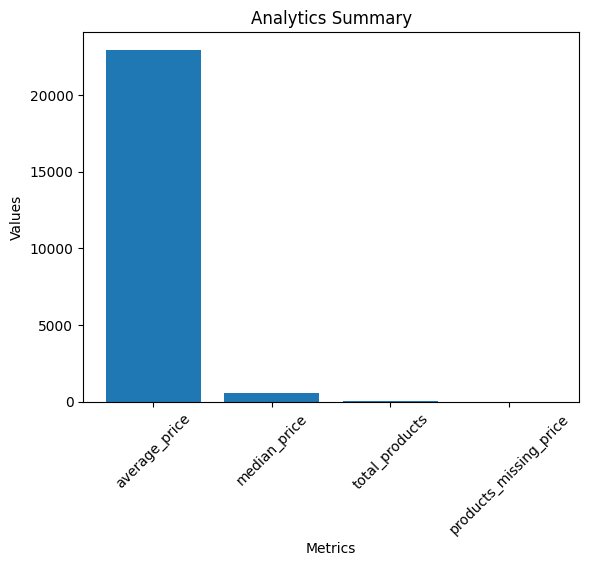

In [ ]:
#plotting a barchart using OOP plot style for visualization
row = analytics_summary.iloc[0]  #extract each single row starting from the first index

fig, ax = plt.subplots() #creating the figure

ax.bar(row.index, row.values) #x-axis = column names and y-axis = values.

#labels
ax.set_title("Analytics Summary")
ax.set_xlabel("Metrics")
ax.set_ylabel("Values")

##rotate labels for readability(user and developer friendly)
ax.tick_params(axis='x', rotation=45)


plt.show()
